In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from sklearn import metrics

#%matplotlib notebook
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [4]:
housing = pd.read_csv("E:\\phy\\minort\\.ipynb_checkpoints\\housing.csv")

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
fig = plt.figure()
scatter_matrix(housing,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

In [11]:
housing.hist(figsize=(25,25),bins=50);

In [12]:
def getOutliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"(IQR = {IQR}) Outliers are values outside the range: ({lower_bound}, {upper_bound})")

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers found: {len(outliers)} out of total {df[column].size}")

    # Remove outliers
    cleaned_df = df[~df[column].isin(outliers[column])]

    return cleaned_df


In [13]:
df_outliersRemoved = getOutliers(housing,"total_rooms")

(IQR = 1700.25) Outliers are values outside the range: (-1102.625, 5698.375)
Outliers found: 1287 out of total 20640


In [14]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
#statistics for missing values
print ("Total_bedrooms column Mode is  "+str(housing["total_bedrooms"].mode())+"\n")
print(housing["total_bedrooms"].describe())

Total_bedrooms column Mode is  0    280.0
Name: total_bedrooms, dtype: float64

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [16]:
total_bedroms = housing[housing["total_bedrooms"].notnull()]["total_bedrooms"]#["total_bedrooms"]
total_bedroms.hist(figsize=(12,8),bins=50)

<Axes: title={'center': 'median_house_value'}>

In [17]:

housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

C:\Users\GOURAV PATIDAR\AppData\Local\Temp\ipykernel_15932\4222663641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)


In [18]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
housing["ocean_proximity"].value_counts()
housing.describe()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [20]:
housing_ind = housing.drop("median_house_value",axis=1)
print(housing_ind.head())
housing_dep = housing["median_house_value"]
print("Medain Housing Values")
print(housing_dep.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252                3  
1      2401.0      1138.0         8.3014                3  
2       496.0       177.0         7.2574                3  
3       558.0       219.0         5.6431                3  
4       565.0       259.0         3.8462                3  
Medain Housing Values
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [21]:
X_train,X_test,y_train,y_test = train_test_split(housing_ind,housing_dep,test_size=0.2,random_state=42)


In [22]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,4
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,4
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,1
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


In [23]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,1
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,1
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,3
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,4
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,4
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,1


In [24]:
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)
print(X_train[0:5,:])
print("test data")
print(X_test[0:5,:])

[[ 1.27258656 -1.3728112   0.34849025  0.22256942  0.21122752  0.76827628
   0.32290591 -0.326196    2.00593172]
 [ 0.70916212 -0.87669601  1.61811813  0.34029326  0.59309419 -0.09890135
   0.6720272  -0.03584338  2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 -0.34259695 -0.49522582 -0.44981806
  -0.43046109  0.14470145  2.00593172]
 [ 1.23269811 -1.38217186  0.58654547 -0.56148971 -0.40930582 -0.00743434
  -0.38058662 -1.01786438  2.00593172]
 [-0.10855122  0.5320839   1.14200767 -0.11956547 -0.25655915 -0.48587717
  -0.31496232 -0.17148831 -0.1124266 ]]
test data
[[ 0.28534728  0.1951     -0.28632369 -0.52286157 -0.24701249 -0.03030109
  -0.37008673 -1.15508475 -0.1124266 ]
 [ 0.06097472 -0.23549054  0.11043502  0.13841528 -0.24701249  0.12185077
   0.220532   -0.70865905 -0.1124266 ]
 [-1.42487026  1.00947776  1.85617335  0.54630997 -0.24701249 -0.10241931
   1.21539643 -0.21040155  1.29981228]
 [ 0.42994293 -0.63799909 -0.92113763  0.18808002 -0.24701249  0.24497944
  -0.013090

In [25]:
linearRegModel = LinearRegression(n_jobs=-1)
#fit the model to the training data (learn the coefficients)
linearRegModel.fit(X_train,y_train)
#print the intercept and coefficients 
print("Intercept is "+str(linearRegModel.intercept_))
print("coefficients  is "+str(linearRegModel.coef_))

Intercept is 207194.69373788778
coefficients  is [-85854.94724101 -90946.06271148  14924.30655143 -17693.23405277
  48767.60670995 -43884.16852449  17601.31495096  77144.10164179
   -451.52015229]


In [26]:
#predict on the test data
y_pred = linearRegModel.predict(X_test)

<Figure size 640x480 with 0 Axes>

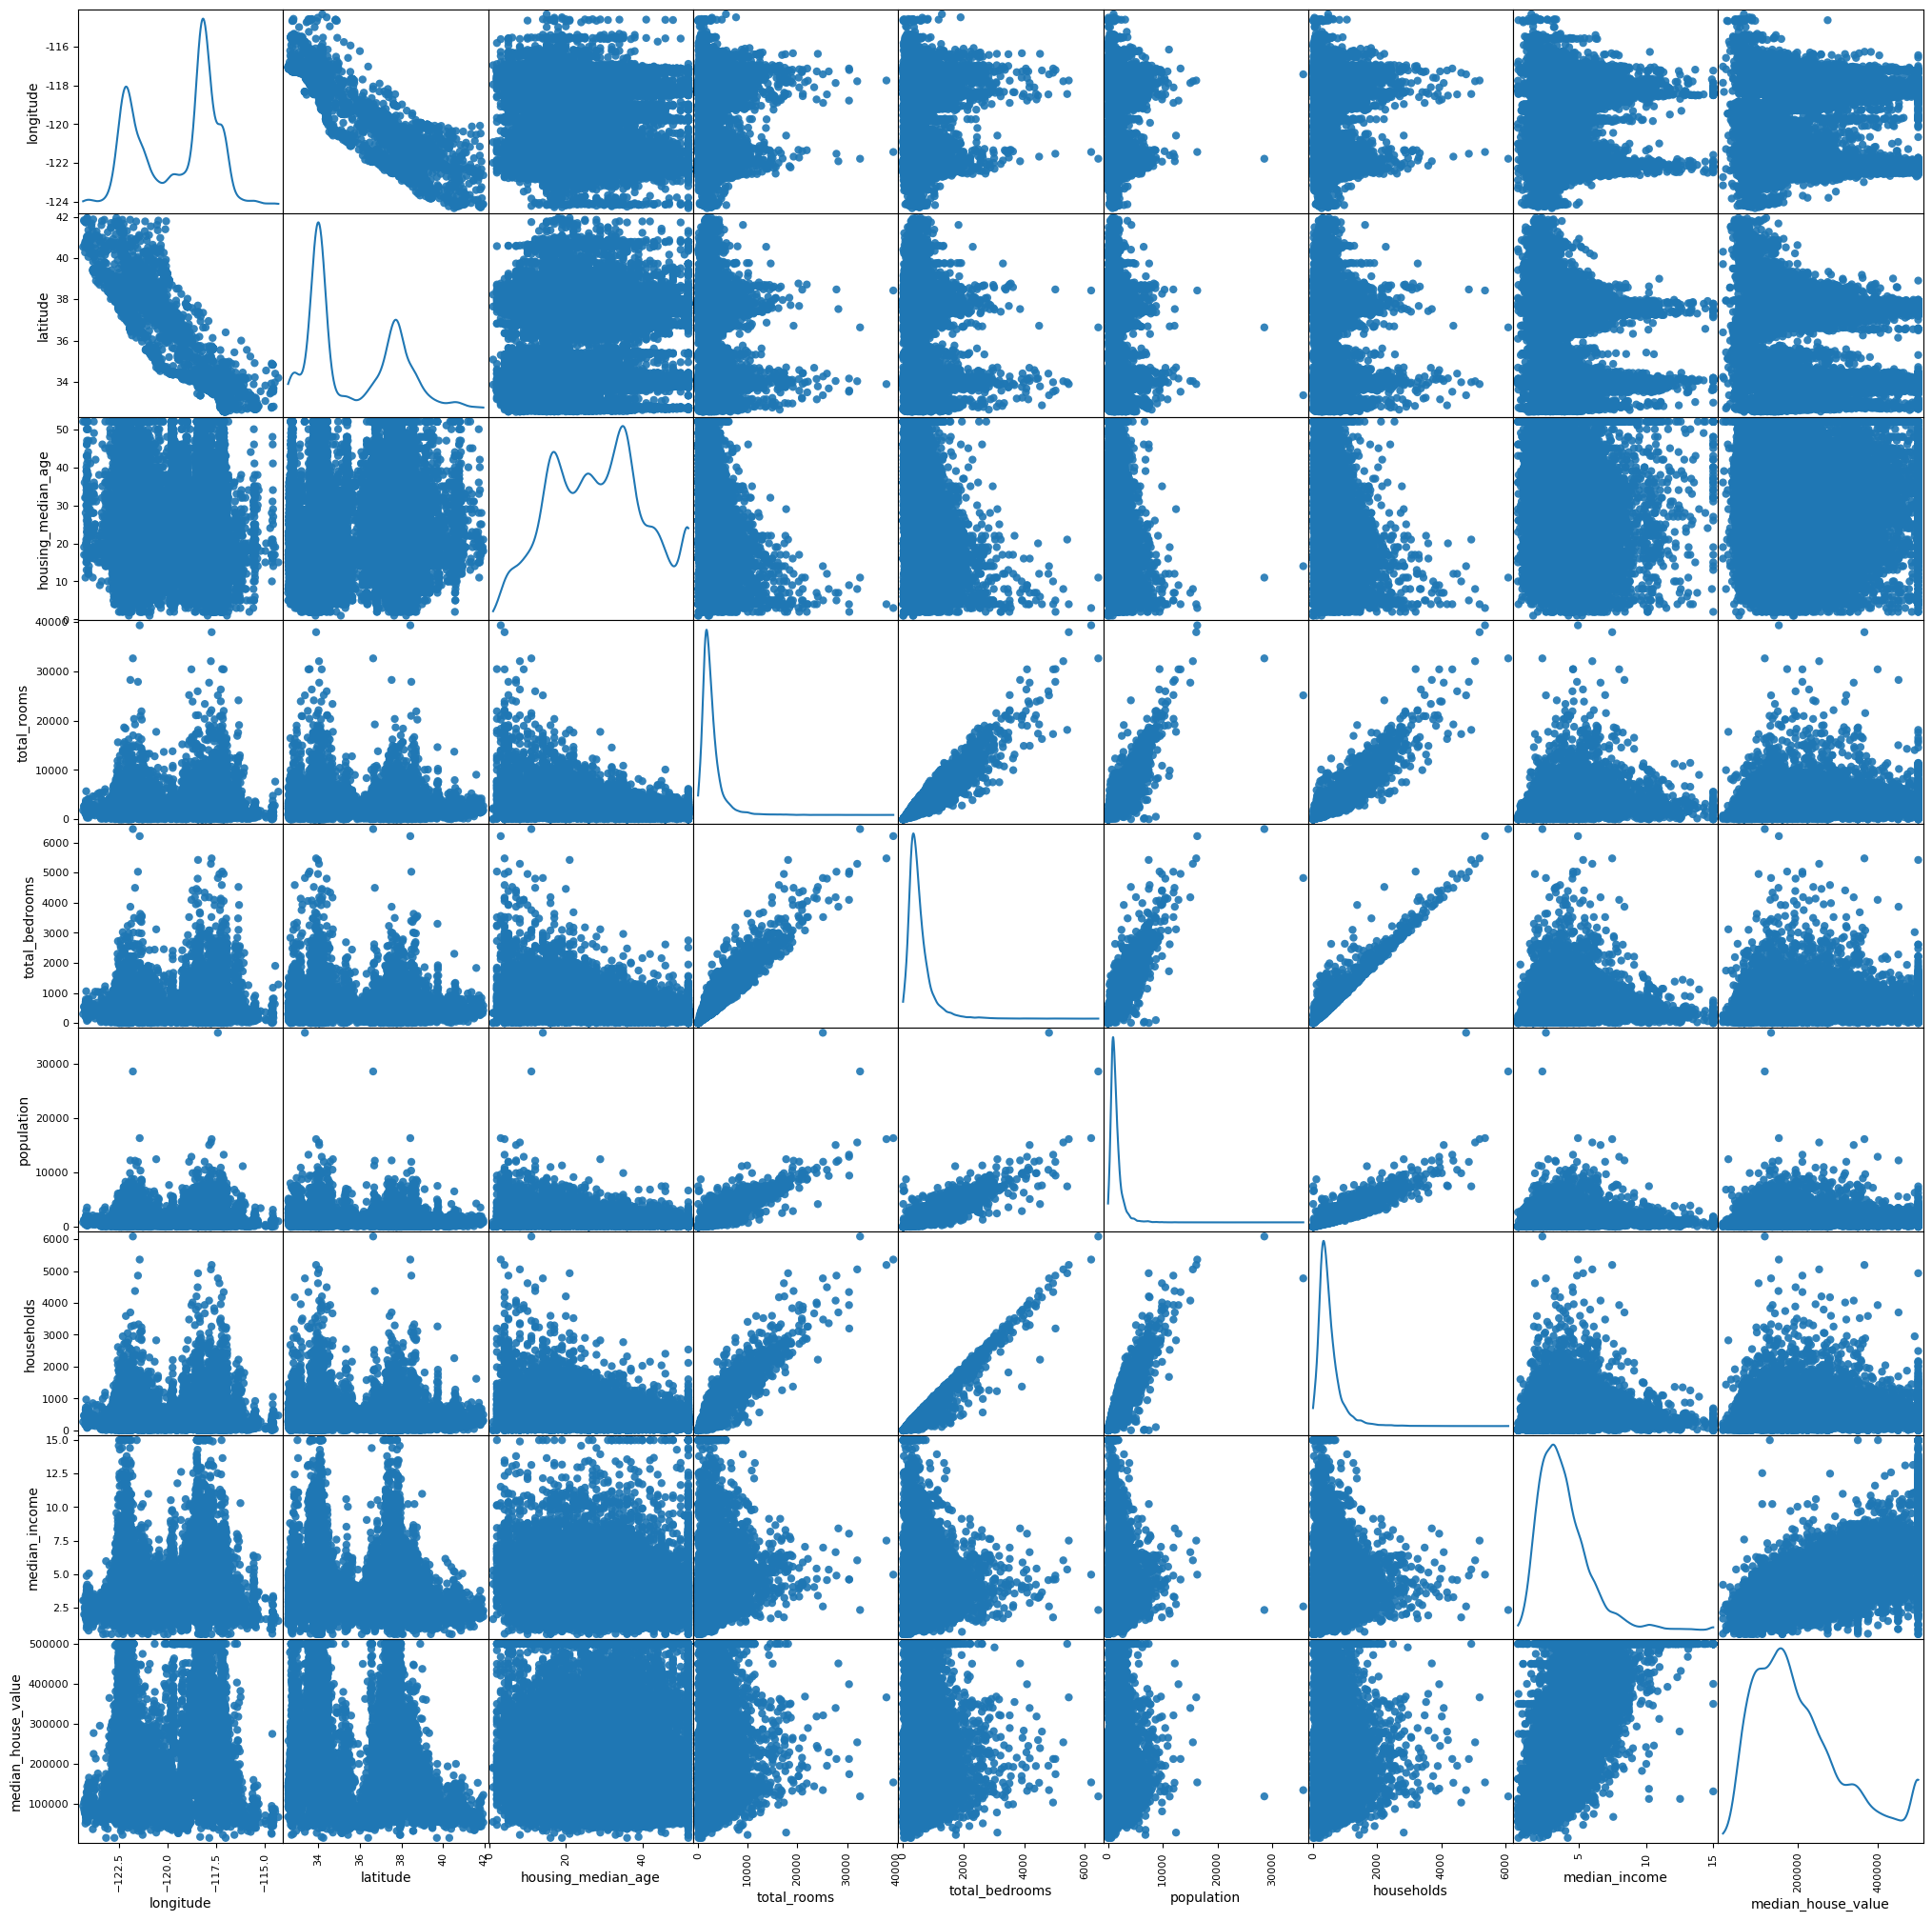

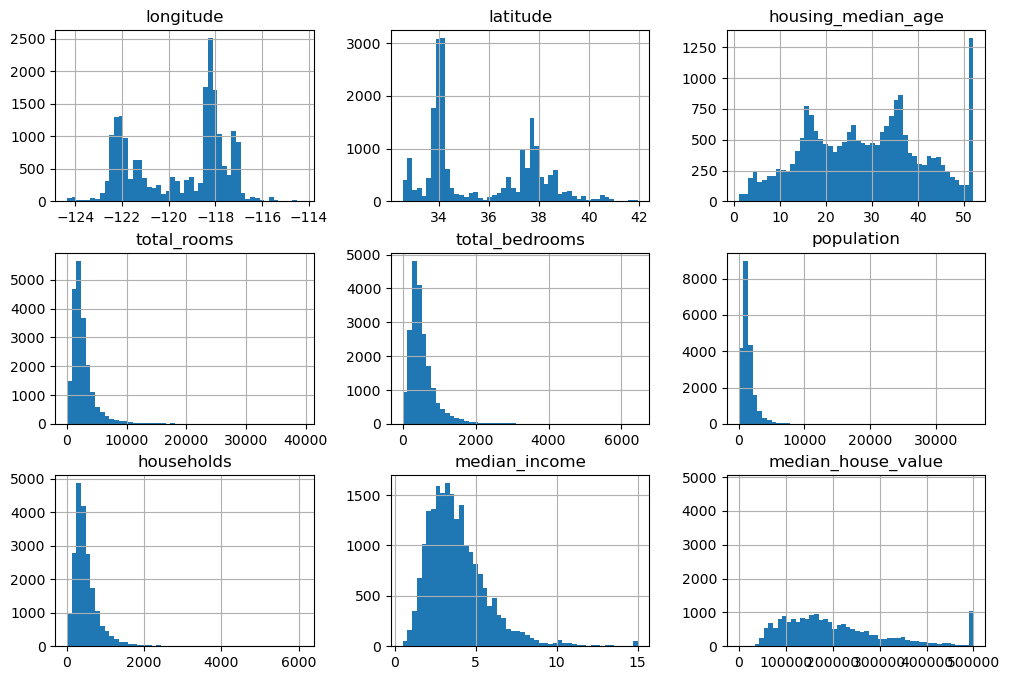

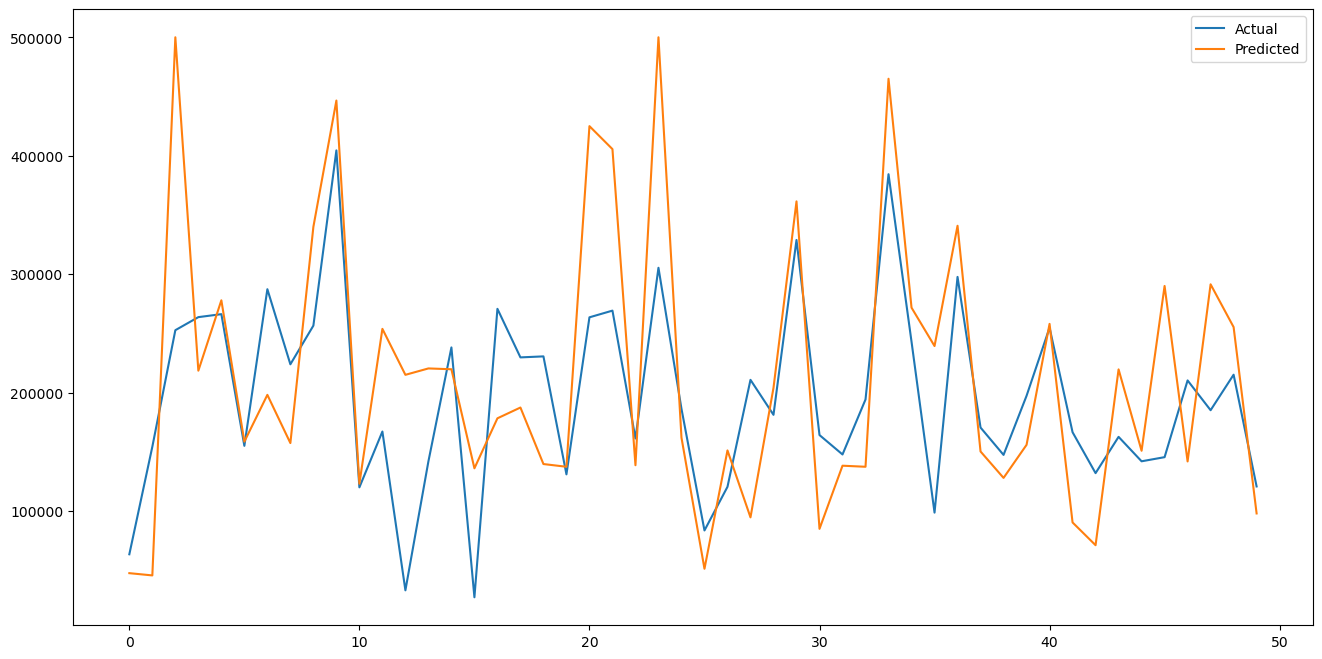

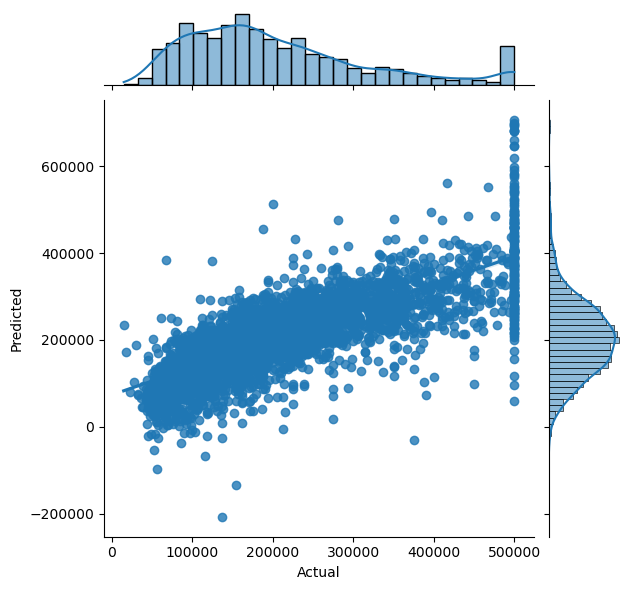

In [27]:
test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);
plt.show()

In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
linear_MSE=np.sqrt(metrics.mean_squared_error(y_train,linearRegModel.predict(X_train)))

71147.87146118372


In [29]:
linear_MSE

69361.0714290645

In [30]:
dtReg = DecisionTreeRegressor(max_depth=9)
dtReg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [31]:
dtReg_y_pred = dtReg.predict(X_test)
dtReg_y_pred

array([ 60503.2556391 ,  75919.52054795, 478283.56097561, ...,
       488611.25      ,  75919.52054795, 211563.96963563])

In [32]:
dtReg_MSE=np.sqrt(metrics.mean_squared_error(y_test,dtReg_y_pred))
dtReg_MSE

61220.35733976384

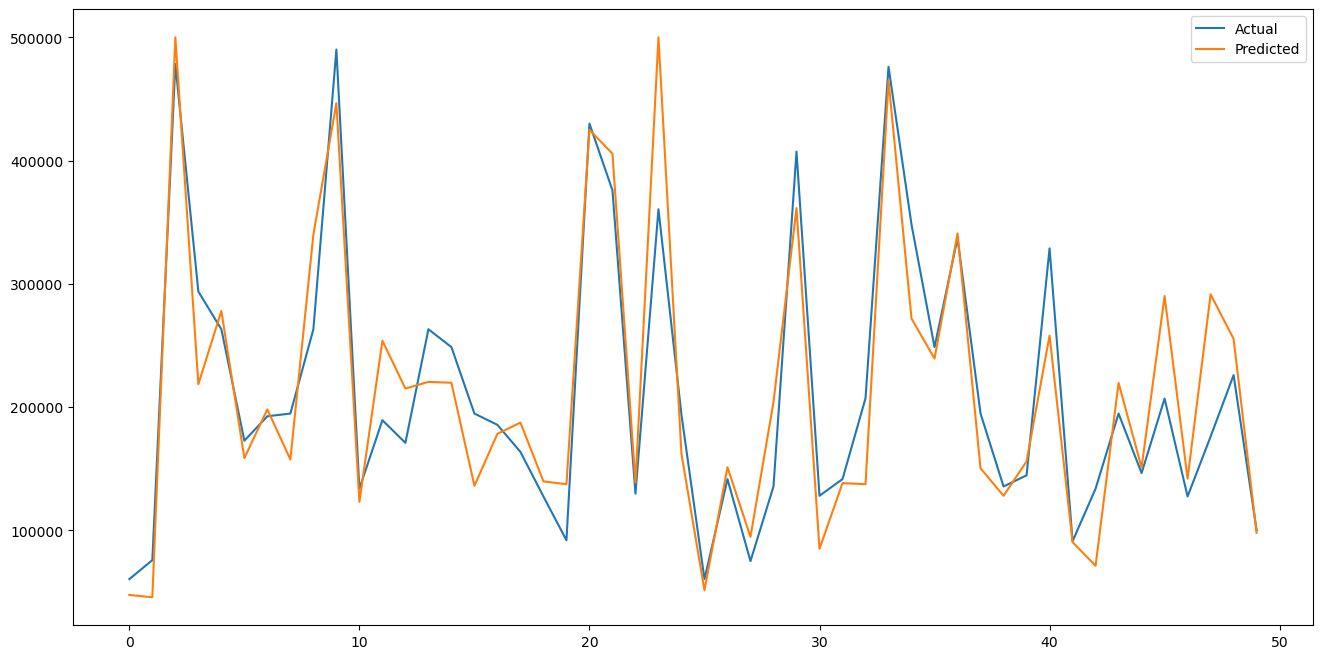

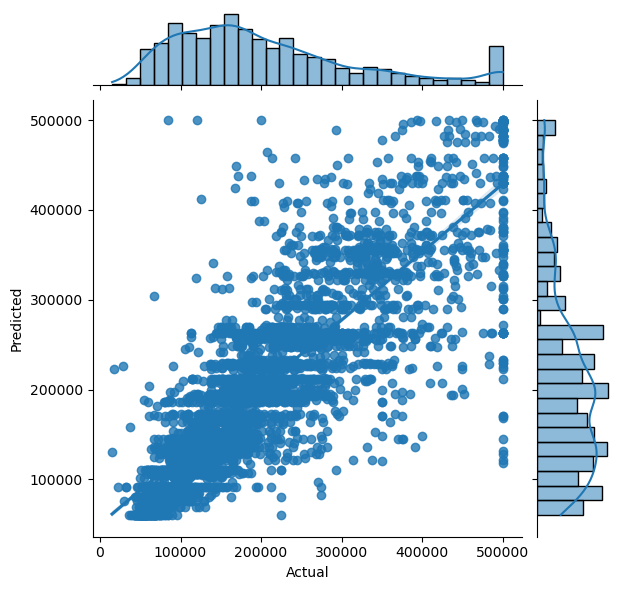

In [33]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
plt.show()

In [34]:
rfReg = RandomForestRegressor(30)
rfReg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30)

In [35]:
rfReg_y_pred = rfReg.predict(X_test)
print(len(rfReg_y_pred))
print(len(y_test))
print(rfReg_y_pred[0:5])
print(y_test[0:5])

4128
4128
[ 50836.66666667  63510.         461617.         253323.33333333
 228523.33333333]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64


In [36]:
rfReg_MSE=np.sqrt(metrics.mean_squared_error(y_test,rfReg_y_pred))
rfReg_MSE

50166.769551104815

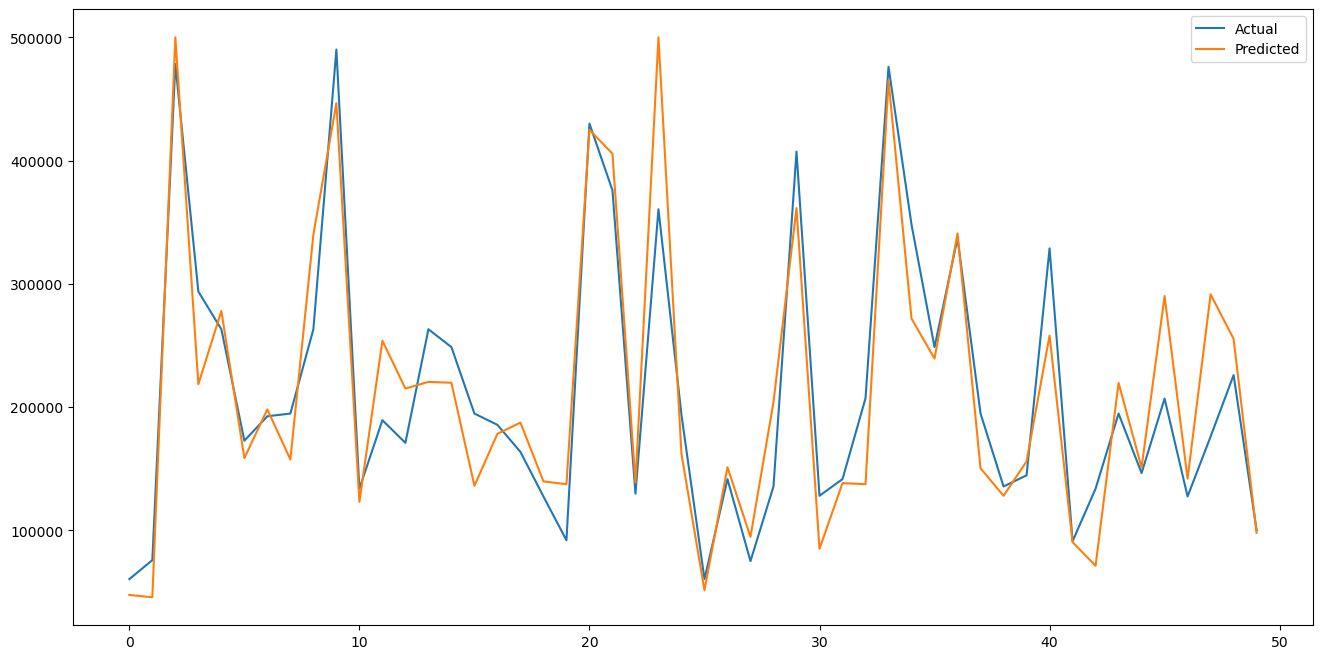

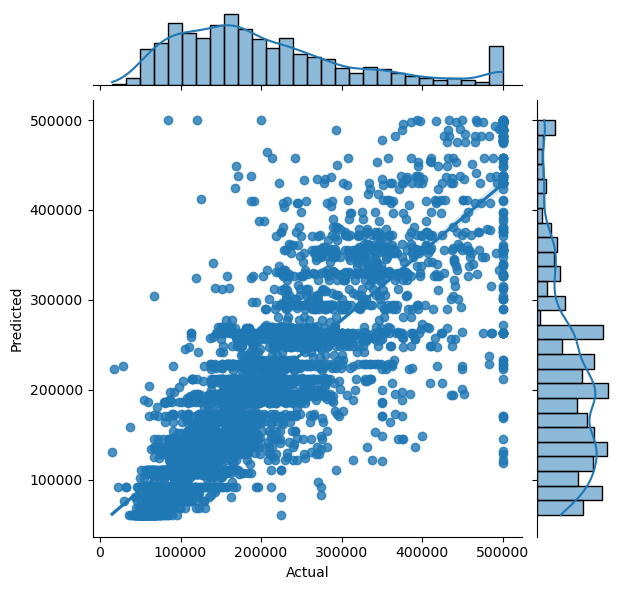

In [37]:
test = pd.DataFrame({'Predicted':dtReg_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
plt.show()

In [38]:
xgbmodel = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgbmodel.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
xgb_y_pred = xgbmodel.predict(X_test)


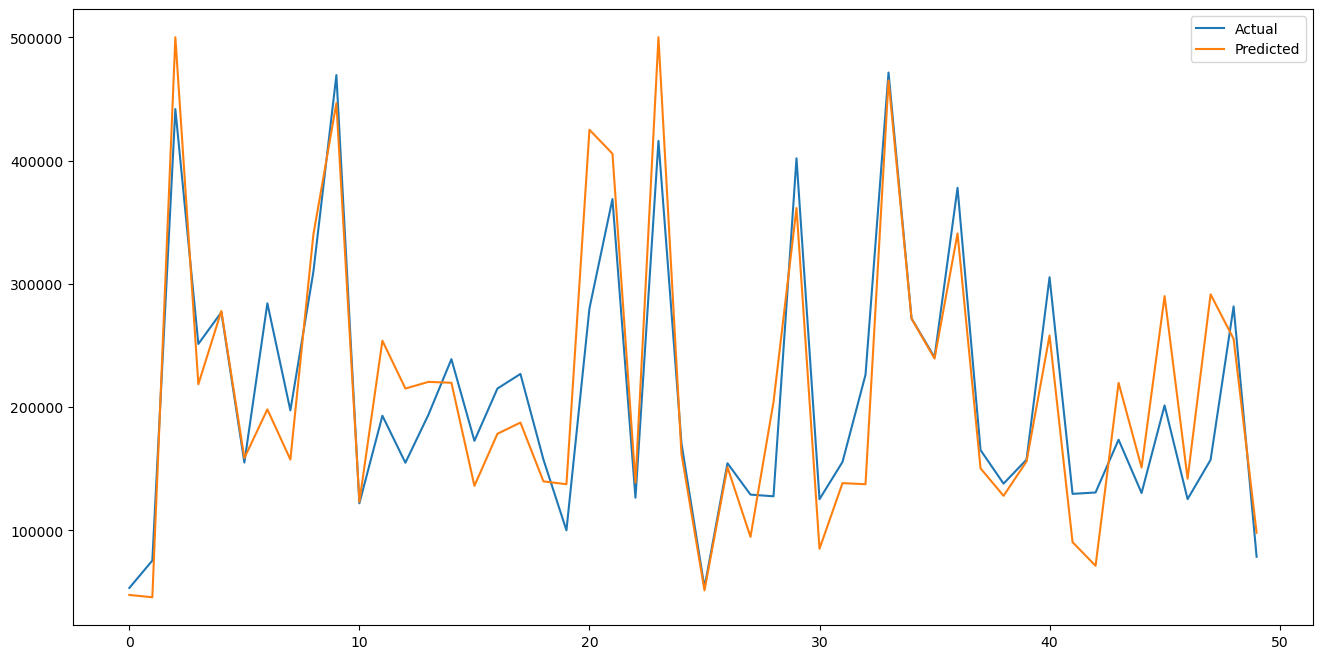

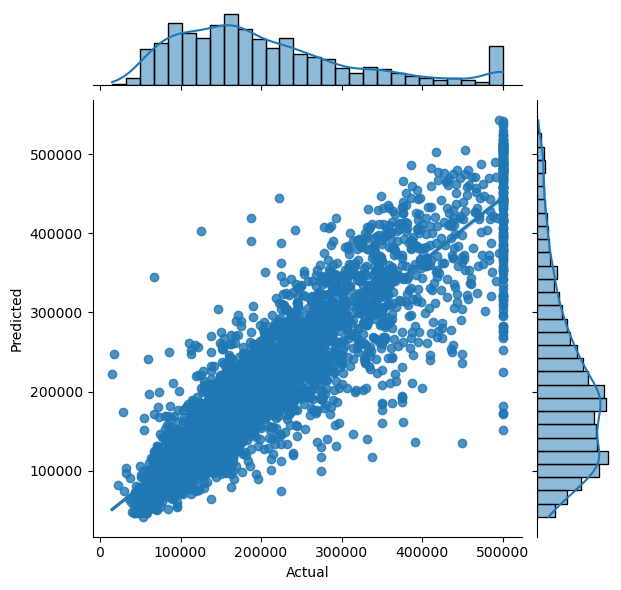

In [40]:
test = pd.DataFrame({'Predicted':xgb_y_pred,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg")
plt.show()

In [41]:
xgb_MSE=np.sqrt(metrics.mean_squared_error(y_test,xgb_y_pred))
xgb_MSE

49052.45114129142

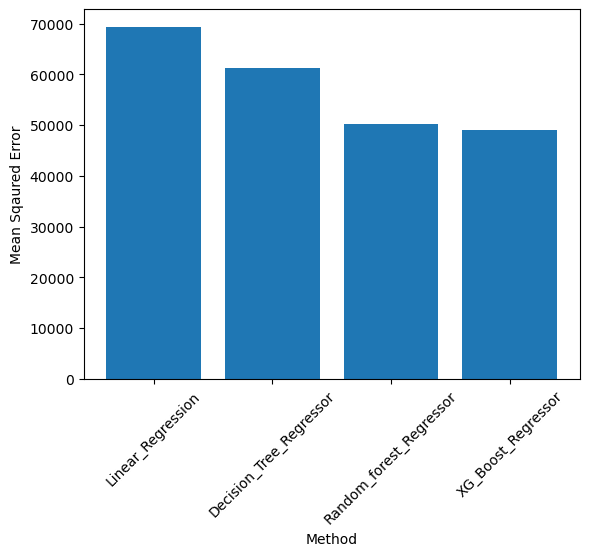

In [42]:
import matplotlib.pyplot as plt

# Example data
categories = ['Linear_Regression', 'Decision_Tree_Regressor', 'Random_forest_Regressor','XG_Boost_Regressor']
values = [linear_MSE,dtReg_MSE,rfReg_MSE,xgb_MSE]

# Create the bar plot
plt.bar(categories, values)
plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('Method')
plt.ylabel('Mean Sqaured Error')


# Show the plot
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np
import matplotlib.pyplot as plt

def check_overfitting(model, X_train, y_train, X_test, y_test):
    # Step 1: Training and Test Errors
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate training and test errors (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    print(f"Training RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    
    if train_rmse < test_rmse:
        print("Warning: Possible overfitting detected (lower training error, higher test error).")
    
    # Step 2: Cross-validation error
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.mean(np.sqrt(-cv_scores))  # Cross-validation RMSE
    print(f"Cross-validation RMSE: {cv_rmse:.2f}")
    
    if cv_rmse > train_rmse:
        print("Warning: Possible overfitting detected (cross-validation error higher than training error).")
    
    # Step 3: Plotting Learning Curves
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
    
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    plt.plot(train_sizes, train_mean, label='Training Error')
    plt.plot(train_sizes, test_mean, label='Validation Error')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Example usage:
# model = xgb.XGBRegressor()  # or any model you are using
# check_overfitting(model, X_train, y_train, X_test, y_test)


Training RMSE: 38658.41
Test RMSE: 49052.45
Cross-validation RMSE: 48820.63


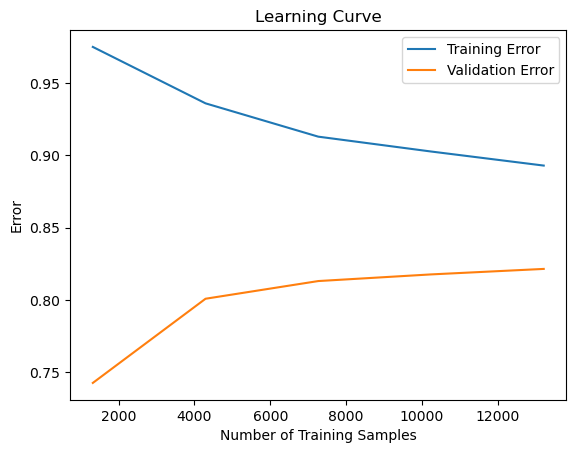

In [44]:
check_overfitting(xgbmodel,X_train, y_train, X_test, y_test)

In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# 2) Quick grid search on sklearn wrapper to get best params
param_grid = {
    'max_depth':    [3, 5],
    'learning_rate':[0.05, 0.1],
    'n_estimators': [100, 150],
    'reg_alpha':    [0.1, 0.5],
    'reg_lambda':   [1, 2],
}
wrapper = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
gs = GridSearchCV(wrapper, param_grid, cv=3,
                  scoring='neg_mean_squared_error',
                  n_jobs=-1)
gs.fit(X_train, y_train)
best_params = gs.best_params_
print("Best params:", best_params)

# 3) Prepare DMatrix for train/val
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)

# 4) Build full param dict for xgb.train
#    Note: sklearn’s “learning_rate” ↔ xgb “eta”
params = {
    
    'objective':    'reg:squarederror',
    'max_depth':    best_params['max_depth'],
    'eta':          best_params['learning_rate'],
    'alpha':        best_params['reg_alpha'],
    'lambda':       best_params['reg_lambda'],
    'eval_metric':  'rmse'
}
num_round = best_params['n_estimators']

# 5) Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)

# 6) Predict & compute RMSE
train_pred = bst.predict(dtrain)
test_pred  = bst.predict(dvalid)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  test_pred ))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test  RMSE: {test_rmse:.2f}")

# 7) (Optional) Cross‑validation using sklearn wrapper for comparison
cv_rmse = np.mean(
    np.sqrt(-cross_val_score(
        wrapper.set_params(**best_params),
        X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ))
)
print(f"CV RMSE:    {cv_rmse:.2f}")

# Overfitting check
if train_rmse < test_rmse:
    print("⚠️ Possible overfitting: train < test")
if cv_rmse > train_rmse:
    print("⚠️ Possible overfitting: CV > train")


Best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 2}
Train RMSE: 41028.03
Test  RMSE: 49125.86
CV RMSE:    48710.61
⚠️ Possible overfitting: train < test
⚠️ Possible overfitting: CV > train


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best params: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Stopped at iteration: 149
Train RMSE: 40768.89
Test  RMSE: 48771.11
CV RMSE:    48201.09


<Figure size 600x600 with 0 Axes>

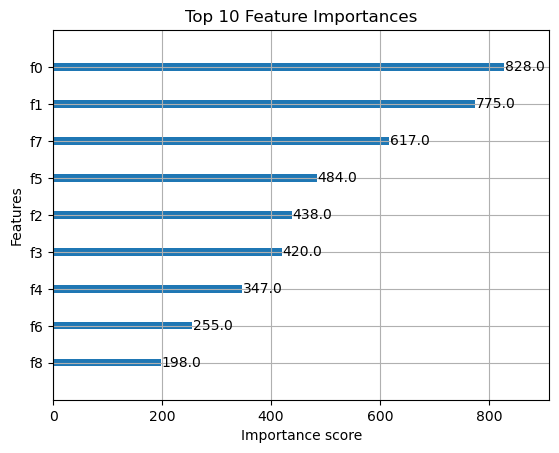

⚠️ Possible overfitting: train < test
⚠️ Possible overfitting: CV > train


In [46]:
# 2) Expanded hyperparameter grid
param_grid = {
    'max_depth':          [3, 5],
    'learning_rate':      [0.05, 0.1],
    'n_estimators':       [100, 150],
    'reg_alpha':          [0.1, 0.5],
    'reg_lambda':         [1, 2],
    'subsample':          [0.6, 0.8, 1.0],
    'colsample_bytree':   [0.6, 0.8, 1.0],
    'gamma':              [0, 1, 5]
}

# 3) Quick GridSearchCV on the sklearn wrapper to find best params
wrapper = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    verbosity=0
)
grid = GridSearchCV(
    estimator=wrapper,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print("Best params:", best_params)

# 4) Prepare DMatrix objects for xgb.train
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test,  label=y_test)

# 5) Build full params dict for xgb.train
params = {
    'objective':    'reg:squarederror',
    'max_depth':    best_params['max_depth'],
    'eta':          best_params['learning_rate'],   # sklearn "learning_rate" ↔ xgb "eta"
    'alpha':        best_params['reg_alpha'],
    'lambda':       best_params['reg_lambda'],
    'subsample':    best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'gamma':        best_params['gamma'],
    'eval_metric':  'rmse'
}
num_round = best_params['n_estimators']

# 6) Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=num_round,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=10,
    verbose_eval=False
)
print(f"Stopped at iteration: {bst.best_iteration}")

# 7) (Optionally) retrain using only the best_iteration to avoid over‑complexity
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=bst.best_iteration,
    evals=[(dvalid, 'validation')],
    verbose_eval=False
)

# 8) Evaluate performance
train_pred = bst.predict(dtrain)
test_pred  = bst.predict(dvalid)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test,  test_pred))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test  RMSE: {test_rmse:.2f}")

# 9) Cross‑validation for comparison
cv_rmse = np.mean(
    np.sqrt(-cross_val_score(
        wrapper.set_params(**best_params),
        X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    ))
)
print(f"CV RMSE:    {cv_rmse:.2f}")

# 10) Plot top‑10 feature importances
plt.figure(figsize=(6,6))
xgb.plot_importance(bst, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

# 11) Overfitting checks
if train_rmse < test_rmse:
    print("⚠️ Possible overfitting: train < test")
if cv_rmse > train_rmse:
    print("⚠️ Possible overfitting: CV > train")

In [50]:
# Save your final model
bst.save_model('E:\\phy\\minort\\model.json')


Model file exists.


Model loaded successfully!
